# Customer Churn Prediction Analysis
**Author:** Ethan Tran
**Dataset:** Telco Customer Churn  

## Project Overview
This notebook performs exploratory data analysis on telecom customer data to understand factors that influence customer churn. The goal is to build a predictive model that can identify customers likely to leave the service.

## Business Context
- Customer churn costs companies significant revenue
- Acquiring new customers is 5-25x more expensive than retention
- Understanding churn patterns enables proactive retention strategies

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [21]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Shape: {df.shape[0]:,} rows and {df.shape[1]} columns")

Shape: 7,043 rows and 21 columns


In [22]:
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Data Exploration

In [28]:
# Detailed information about the dataset
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [26]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found")
else:
    print("Missing values per column:")
    missing[missing > 0].sort_values(ascending=False)

No missing values found


In [27]:
# Analyze the taget variable (churn)
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentages:")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentages:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


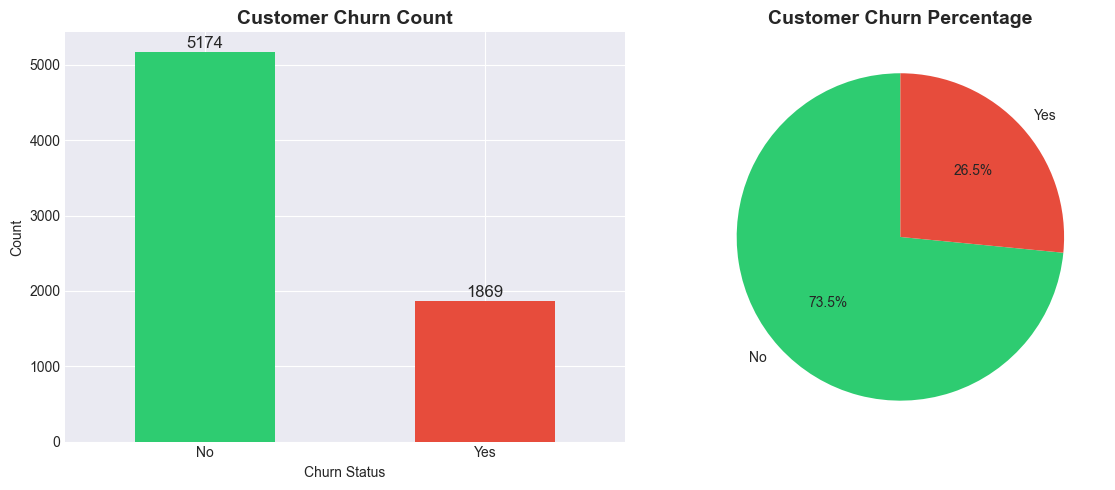

In [48]:
# Visualize churn distribution
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)    
ax2 = fig.add_subplot(1, 2, 2)     

# Count plot
df['Churn'].value_counts().plot(kind = 'bar', ax=ax1, color = ['#2ecc71', '#e74c3c'])
ax1.set_title('Customer Churn Count', fontsize = 14, weight = 'bold')
ax1.set_xlabel('Churn Status')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No', 'Yes'], rotation=0)

# Add value labels on bars
for i, v in enumerate(df['Churn'].value_counts()):
    ax1.text(i, v + 50, str(v), ha = 'center', fontsize=12)

# Pie Chart
df['Churn'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                                colors=['#2ecc71', '#e74c3c'], startangle=90)
ax2.set_title("Customer Churn Percentage", fontsize = 14, weight = 'bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
    f